# Supervised learning (regresi)

Anggota Kelompok:


*   Chacha Alisha Dewintasari (1305220036)
*   Fasya Agneta Meliatari S.Meliala (1305223042)




**LIBRARY**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

**READ** **DATASET**

In [ ]:
df = pd.read_excel("factbook-_1_.xls")

In [ ]:
df

,Country,Area,Birth rate,Current account balance,Death rate,Electricity consumption,Electricity production,Exports,GDP,GDP per capita,...,Life expectancy at birth,Military expenditures,Natural gas consumption,Oil consumption,Population,Public debt,Railways,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,Japan,"377,835",9.47,"$170,200,000,000.00",8.95,"971,000,000,000","1,044,000,000,000.00","$538,800,000,000.00","$3,745,000,000,000.00","$29,400.00",...,81.15,1,"80,420,000,000.00","5,290,000","127,417,244",164.3,23705,"664,600,000,000.00",1.39,4.7
1,Germany,"357,021",8.33,"$73,590,000,000.00",10.55,"519,500,000,000","560,000,000,000.00","$893,300,000,000.00","$2,362,000,000,000.00","$28,700.00",...,78.65,1.5,"99,550,000,000.00","2,891,000","82,431,390",65.8,46039,"96,840,000,000.00",1.39,10.6
2,Saudi Arabia,"1,960,582",29.56,"$51,500,000,000.00",2.62,"128,500,000,000","138,200,000,000.00","$113,000,000,000.00","$310,200,000,000.00","$12,000.00",...,75.46,10,"56,400,000,000.00","1,550,000","26,417,599",75,1392,"23,620,000,000.00",4.05,25
3,Russia,"17,075,200",9.80,"$46,040,000,000.00",14.52,"894,300,000,000","915,000,000,000.00","$162,500,000,000.00","$1,408,000,000,000.00","$9,800.00",...,67.10,,"405,800,000,000.00","2,310,000","143,420,309",28.2,87157,"124,500,000,000.00",1.27,8.3
4,Switzerland,"41,290",9.77,"$40,950,000,000.00",8.48,"54,530,000,000","63,470,000,000.00","$130,700,000,000.00","$251,900,000,000.00","$33,800.00",...,80.39,1,"3,093,000,000.00","290,400","7,489,370",57.2,4533,"69,580,000,000.00",1.42,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Italy,"301,230",8.89,"$(21,100,000,000.00)",10.30,"293,900,000,000","261,600,000,000.00","$336,400,000,000.00","$1,609,000,000,000.00","$27,700.00",...,79.68,1.8,"71,180,000,000.00","1,866,000","58,103,033",105.6,19507,"61,500,000,000.00",1.28,8.6
145,Spain,"504,782",10.10,"$(30,890,000,000.00)",9.63,"218,400,000,000","229,000,000,000.00","$172,500,000,000.00","$937,600,000,000.00","$23,300.00",...,79.52,1.2,"17,960,000,000.00","1,497,000","40,341,462",53.2,14268,"19,700,000,000.00",1.28,10.4
146,United Kingdom,"244,820",10.78,"$(33,460,000,000.00)",10.18,"337,400,000,000","395,900,000,000.00","$347,200,000,000.00","$1,782,000,000,000.00","$29,600.00",...,78.38,2.4,"92,850,000,000.00","1,692,000","60,441,457",39.6,17186,"48,730,000,000.00",1.66,4.8
147,Australia,"7,686,850",12.26,"$(38,300,000,000.00)",7.44,"195,600,000,000","210,300,000,000.00","$86,890,000,000.00","$611,700,000,000.00","$30,700.00",...,80.39,2.7,"23,330,000,000.00","796,500","20,090,437",17.4,43802,"35,140,000,000.00",1.76,5.1


**PREPROCESSING** **DATA**

In [ ]:
# Fungsi untuk membersihkan dan meratakan nama kolom
def bersihkan_nama_kolom(columns):
    return columns.str.strip().str.lower().str.replace(' ', '').str.replace(r'\W', '', regex=True)

df.columns = bersihkan_nama_kolom(df.columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         149 non-null    object 
 1   area                            149 non-null    object 
 2   birthrate                       149 non-null    float64
 3   currentaccountbalance           149 non-null    object 
 4   deathrate                       149 non-null    float64
 5   electricityconsumption          149 non-null    object 
 6   electricityproduction           149 non-null    object 
 7   exports                         149 non-null    object 
 8   gdp                             149 non-null    object 
 9   gdppercapita                    149 non-null    object 
 10  gdprealgrowthrate               149 non-null    float64
 11  highways                        149 non-null    object 
 12  imports                         149 

In [ ]:
data = df[['gdp', 'exports', 'imports', 'industrialproductiongrowthrate', 'investment', 'unemploymentrate']]

data.head()

,gdp,exports,imports,industrialproductiongrowthrate,investment,unemploymentrate
0,"$3,745,000,000,000.00","$538,800,000,000.00","$401,800,000,000.00",6.6,24,4.7
1,"$2,362,000,000,000.00","$893,300,000,000.00","$716,700,000,000.00",2.2,17.6,10.6
2,"$310,200,000,000.00","$113,000,000,000.00","$36,210,000,000.00",2.8,17.2,25
3,"$1,408,000,000,000.00","$162,500,000,000.00","$92,910,000,000.00",6.4,19.1,8.3
4,"$251,900,000,000.00","$130,700,000,000.00","$121,100,000,000.00",4.7,20.4,3.4


In [ ]:
# Fungsi untuk mengonversi nilai moneter dari string ke numerik
def convert_to_numeric(value):
    return float(value.replace("$", "").replace(",", ""))

# Konversi kolom ke numerik
data["gdp"] = data["gdp"].apply(convert_to_numeric)
data["exports"] = data["exports"].apply(convert_to_numeric)
data["imports"] = data["imports"].apply(convert_to_numeric)

<ipython-input-985-13d5dddef08a>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-985-13d5dddef08a>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-985-13d5dddef08a>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Mengubah kolom menjadi tipe data numerik, nilai non-numerik akan menjadi NaN
data['industrialproductiongrowthrate'] = pd.to_numeric(data['industrialproductiongrowthrate'], errors='coerce')
data['investment'] = pd.to_numeric(data['investment'], errors='coerce')
data['unemploymentrate'] = pd.to_numeric(data['unemploymentrate'], errors='coerce')

# Menggunakan SimpleImputer untuk menggantikan nilai NaN dengan nilai rata-rata kolom
imputer = KNNImputer()

# Mengimputasi kolom-kolom yang memiliki nilai NaN
data[['industrialproductiongrowthrate', 'investment', 'unemploymentrate']] = imputer.fit_transform(data[['industrialproductiongrowthrate', 'investment', 'unemploymentrate']])

<ipython-input-986-1e4613cfa6fe>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-986-1e4613cfa6fe>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-986-1e4613cfa6fe>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-986-1e4

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gdp                             149 non-null    float64
 1   exports                         149 non-null    float64
 2   imports                         149 non-null    float64
 3   industrialproductiongrowthrate  149 non-null    float64
 4   investment                      149 non-null    float64
 5   unemploymentrate                149 non-null    float64
dtypes: float64(6)
memory usage: 7.1 KB


In [ ]:
# Normalisasi data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)
normalized_data = pd.DataFrame(normalized_data, columns=data.columns)

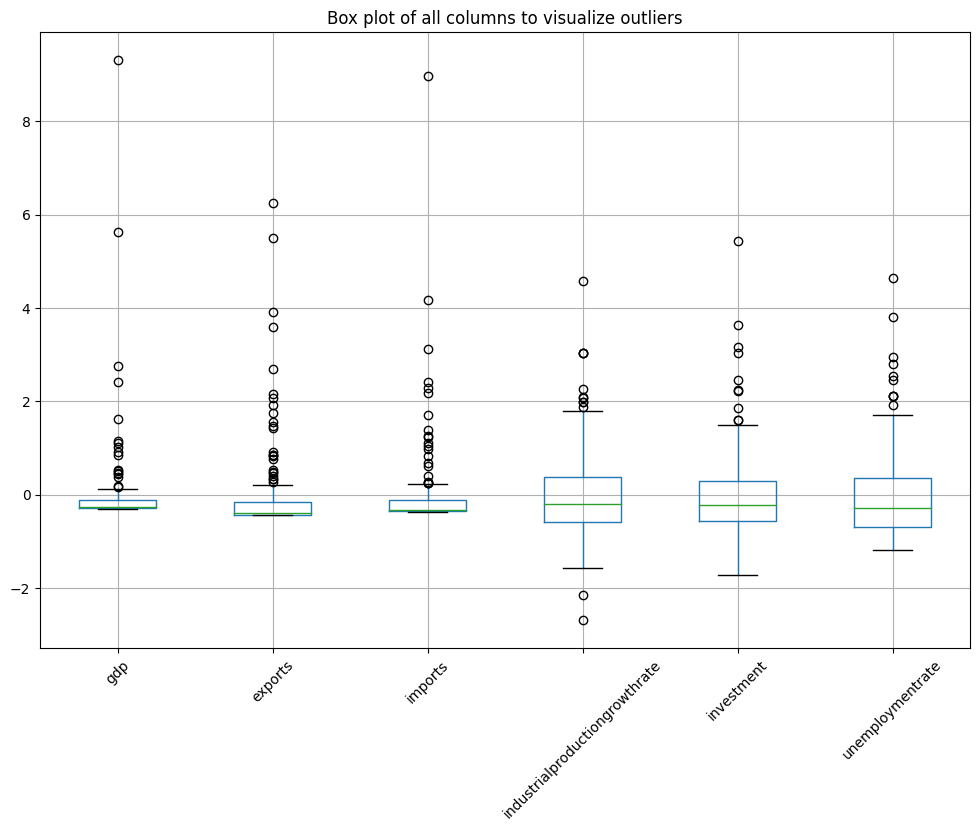

In [ ]:
#Box Plot Visulisasi Outliers
plt.figure(figsize=(12, 8))
normalized_data.boxplot()
plt.title('Box plot of all columns to visualize outliers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Menghapus outliers
outlier_detector = IsolationForest(contamination=0.1)
outliers = outlier_detector.fit_predict(normalized_data)
cleaned_data = normalized_data[outliers == 1]

In [ ]:
#Membagi Data Set
X = cleaned_data.drop('gdp', axis=1)
y = cleaned_data['gdp']

**Metode Supervised Learning (MLP)**

In [ ]:
#Membagi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi dan melatih MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)
mlp_regressor.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)

In [ ]:
# Membuat prediksi pada data latih
y_pred_train = mlp_regressor.predict(X_train)
y_pred_test = mlp_regressor.predict(X_test)

In [ ]:
# Evaluasi Kinerja Model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [ ]:
print("Training Score (R^2):", mlp_regressor.score(X_train, y_train))
print("Test Score (R^2):", mlp_regressor.score(X_test, y_test))
print("R^2 Score:", r2_test)
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)

Training Score (R^2): 0.6315334179824482
Test Score (R^2): 0.5146872522993096
R^2 Score: 0.5146872522993096
Mean Squared Error: 0.018423464133069826
Mean Absolute Error: 0.09258073034013033
